In [468]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import xlrd
import os 
import sklearn
import xgboost
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from category_encoders import OneHotEncoder
from category_encoders import OrdinalEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
!pip install xgboost
from xgboost import XGBClassifier
from sklearn.inspection import permutation_importance
from sklearn.metrics import classification_report, plot_confusion_matrix, plot_roc_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from pprint import pprint
from scipy.stats import uniform, truncnorm, randint
from sklearn.tree import export_graphviz
import graphviz
from sklearn.tree import DecisionTreeClassifier

In [300]:
df = pd.read_csv('https://raw.githubusercontent.com/James-Hagerman/BW_1/master/contraceptive_for_students.csv')

In [301]:
df.head()

,wife_age,wife_education,husband_education,num_child,wife_religion,wife_work,husband_occupation,standard_living,media_exposure,contraceptive
0,24,2,3,3,1,1,2,3,0,1
1,45,1,3,10,1,1,3,4,0,1
2,43,2,3,7,1,1,3,4,0,1
3,42,3,2,9,1,1,3,3,0,1
4,36,3,3,8,1,1,3,2,0,1


In [540]:

df.shape

(1473, 10)

In [303]:
#df['education'] = df['wife_education'] + df['husband_education']

In [304]:
from pandas_profiling import ProfileReport

profile = ProfileReport(df, minimal = True).to_notebook_iframe()

# Distribution

<AxesSubplot:>

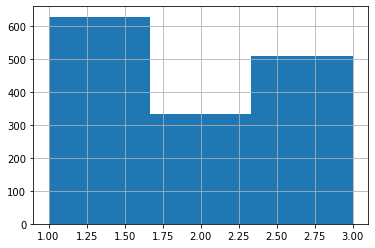

In [305]:
df['contraceptive'].hist(bins =3)

<AxesSubplot:>

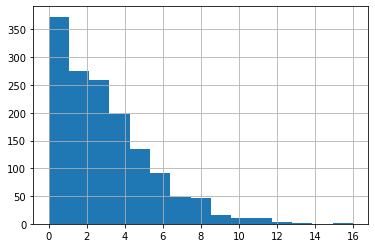

In [306]:
df['num_child'].hist(bins = 15)

# Exploring Data

In [307]:
df['wife_age'].nunique()

34

In [308]:
df['wife_education'].nunique()

4

In [309]:
df['husband_education'].nunique()


4

In [310]:
df['num_child'].nunique()

15

In [311]:
df['wife_religion'].nunique()


2

In [312]:
df['standard_living'].nunique()

4

In [313]:
df['media_exposure'].nunique()

2

In [314]:
#df['education'].nunique()

In [588]:
df['wife_age'].value_counts()

0.0    73
Name: wife_age, dtype: int64

# Splitting

I am going to be predictiing the contraceptive used, the number of children, and total education
Also doing logistic regressions on wife_religion, media_exposure, wife_work

### Contraceptive (Tree)

In [315]:
target_con = 'contraceptive'
y_con = df[target_con]
X_con = df.drop(target_con, axis = 1)

In [316]:
X_train_con, X_val_con, y_train_con, y_val_con = train_test_split(X_con, y_con, test_size = .05, random_state = 42)

### Number of children (Linear Regression)

In [317]:
target_child = 'num_child'
y_child = df[target_child]
X_child = df.drop(target_child, axis = 1)

In [318]:
X_train_child, X_val_child, y_train_child, y_val_child = train_test_split(X_child, y_child, test_size = .05, random_state = 42)

### Education (Linear Regression)

In [319]:
#target_ed = 'education'
#y_ed = df[target_ed]
#X_ed = df.drop([target_ed, 'wife_education', 'husband_education'], axis = 1)

In [320]:
#X_train_ed, X_val_ed, y_train_ed, y_val_ed = train_test_split(X_ed, y_ed, test_size = .05, random_state = 42)

### Wife Religion (Logistic Regression)

In [321]:
target_rel = 'wife_religion'
y_rel = df[target_rel]
X_rel = df.drop(target_rel, axis = 1)

In [322]:
X_train_rel, X_val_rel, y_train_rel, y_val_rel = train_test_split(X_rel, y_rel, test_size = .05, random_state = 42)

### Media Exposure (Logistic Regression)

In [323]:
target_mex = 'media_exposure'
y_mex = df[target_mex]
X_mex = df.drop(target_mex, axis = 1)

In [324]:
X_train_mex, X_val_mex, y_train_mex, y_val_mex = train_test_split(X_mex, y_mex, test_size = .05, random_state = 42)

### Wife Work (Logistic Regression)

In [325]:
target_ww = 'wife_work'
y_ww = df[target_ww]
X_ww = df.drop(target_ww, axis = 1)

In [326]:
X_train_ww, X_val_ww, y_train_ww, y_val_ww = train_test_split(X_ww, y_ww, test_size = .05, random_state = 42)

# Baseline

In [327]:
print('contraceptive Baseline score:', y_train_con.value_counts(normalize = True).max())
print('child Baseline score:', y_train_child.value_counts(normalize = True).max())
print('education Baseline score:', y_train_ed.value_counts(normalize = True).max())

contraceptive Baseline score: 0.4253037884203002
child Baseline score: 0.18656182987848463
education Baseline score: 0.3688348820586133


# Build Models

## Contraceptive

In [328]:

{'bootstrap': True,
 'max_depth': 90,
 'max_features': 3,
 'min_samples_leaf': 4,
 'min_samples_split': 4,
 'n_estimators': 700}

{'bootstrap': True,
 'max_depth': 90,
 'max_features': 3,
 'min_samples_leaf': 4,
 'min_samples_split': 4,
 'n_estimators': 700}

In [392]:
model_con = RandomForestClassifier(n_jobs = -1,
                          max_depth = 90,
                          min_samples_split = 4,
                                   n_estimators = 700,
                                   min_samples_leaf = 4,
                                   max_features = 3,
                                   bootstrap = True,
                                   
                          random_state = 42
                         )
model_con.fit(X_train_con, y_train_con);

# XGBoost
# joblib

In [330]:
print('Training Accuracy contraception:', model_con.score(X_train_con, y_train_con))
print('Validation Accuracy contraception:', model_con.score(X_val_con, y_val_con))

Training Accuracy contraception: 0.73409578270193
Validation Accuracy contraception: 0.6081081081081081


In [331]:
X_train_con.head()

,wife_age,wife_education,husband_education,num_child,wife_religion,wife_work,husband_occupation,standard_living,media_exposure
904,25,1,2,3,1,1,2,3,0
65,24,2,4,1,1,1,3,1,0
1148,25,3,3,1,1,0,2,4,0
583,24,4,4,1,1,1,1,4,0
1102,20,3,4,2,1,1,3,2,0


In [332]:
import joblib
from joblib import dump 

dump(model_con, 'model.joblib', compress = True)

['model.joblib']

In [333]:
print(f'scikit-learn=={sklearn.__version__}')
print(f'joblib=={joblib.__version__}')
print(f'xgboost=={xgboost.__version__}')

scikit-learn==0.23.2
joblib==0.16.0
xgboost==1.2.0


In [334]:
# Need to get a .describe for all numeric features
X_train_con['wife_age'].describe()

count    1399.000000
mean       32.624732
std         8.261810
min        16.000000
25%        26.000000
50%        32.000000
75%        39.000000
max        49.000000
Name: wife_age, dtype: float64

In [335]:
X_train_con['wife_education'].describe()

count    1399.000000
mean        2.955683
std         1.017463
min         1.000000
25%         2.000000
50%         3.000000
75%         4.000000
max         4.000000
Name: wife_education, dtype: float64

In [336]:
X_train_con['husband_education'].describe()

count    1399.000000
mean        3.423159
std         0.823254
min         1.000000
25%         3.000000
50%         4.000000
75%         4.000000
max         4.000000
Name: husband_education, dtype: float64

In [337]:
X_train_con['num_child'].describe()

count    1399.000000
mean        3.278056
std         2.366135
min         0.000000
25%         1.000000
50%         3.000000
75%         5.000000
max        16.000000
Name: num_child, dtype: float64

In [338]:
X_train_con['wife_religion'].describe()

count    1399.000000
mean        0.851322
std         0.355898
min         0.000000
25%         1.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: wife_religion, dtype: float64

In [339]:
X_train_con['wife_work'].describe()

count    1399.000000
mean        0.749107
std         0.433682
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: wife_work, dtype: float64

In [340]:
X_train_con['husband_occupation'].describe()

count    1399.000000
mean        2.135096
std         0.864772
min         1.000000
25%         1.000000
50%         2.000000
75%         3.000000
max         4.000000
Name: husband_occupation, dtype: float64

In [341]:
X_train_con['standard_living'].describe()

count    1399.000000
mean        3.133667
std         0.973910
min         1.000000
25%         3.000000
50%         3.000000
75%         4.000000
max         4.000000
Name: standard_living, dtype: float64

In [342]:
X_train_con['media_exposure'].describe()

count    1399.000000
mean        0.075768
std         0.264722
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: media_exposure, dtype: float64

## Children

In [487]:
model_child = LinearRegression()

model_child.fit(X_train_child, y_train_child);

In [488]:
print('Training Accuracy number of children:', model_child.score(X_train_child, y_train_child))
print('Validation Accuracy number of children:', model_child.score(X_val_child, y_val_child))

Training Accuracy number of children: 0.3854624246034325
Validation Accuracy number of children: 0.4338226479265985


## Education 

In [345]:
model_ed = LinearRegression()

model_ed.fit(X_train_ed, y_train_ed);

In [346]:
print('Training Accuracy education:', model_ed.score(X_train_ed, y_train_ed))
print('Validation Accuracy education:', model_ed.score(X_val_ed, y_val_ed))

Training Accuracy education: 0.3766782590760622
Validation Accuracy education: 0.4484015457881344


## Wife Religion

In [389]:
model_rel = LogisticRegression(
            max_iter = 1000,
            solver = 'newton-cg'
)

model_rel.fit(X_train_rel, y_train_rel); 

In [390]:
print('Training Accuracy wife religion:', model_rel.score(X_train_rel, y_train_rel))
print('Validation Accuracy wife religion:', model_rel.score(X_val_rel, y_val_rel))

Training Accuracy wife religion: 0.8456040028591851
Validation Accuracy wife religion: 0.8513513513513513


## Media Exposure

In [349]:
model_mex = LogisticRegression(

    
)

model_mex.fit(X_train_mex, y_train_mex); 

c:\users\james\.virtualenvs\student_test_scores-4tsu-zid\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [350]:
print('Training Accuracy Media Exposure:', model_mex.score(X_train_mex, y_train_mex))
print('Validation Accuracy Media Exposure:', model_mex.score(X_val_mex, y_val_mex))

Training Accuracy Media Exposure: 0.9270907791279486
Validation Accuracy Media Exposure: 0.972972972972973


## Wife Work 

In [351]:
model_ww = LogisticRegression(
        max_iter = 500
)

model_ww.fit(X_train_ww, y_train_ww);

In [352]:
print('Training Accuracy Wife Work:', model_ww.score(X_train_ww, y_train_ww))
print('Validation Accuracy Wife Work:', model_ww.score(X_val_ww, y_val_ww))

Training Accuracy Wife Work: 0.7483917083631165
Validation Accuracy Wife Work: 0.7297297297297297


# Permutation importances 


## Contraceptive(Tree based)

In [353]:

perm_imp_con = permutation_importance(model_con, X_val_con, y_val_con, n_jobs = -1)

In [368]:
data_con = {'importances_mean' : perm_imp_con['importances_mean'],
       'importances_std' : perm_imp_con['importances_std']}

perm_con_df = pd.DataFrame(data_con, X_train_con.columns)
perm_con_df.sort_values('importances_mean', ascending = True, inplace = True)

<AxesSubplot:>

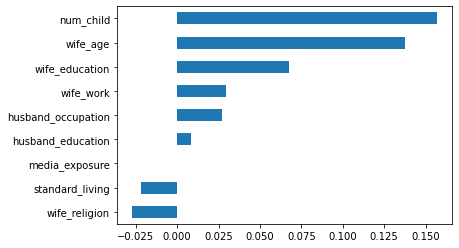

In [369]:
perm_con_df.head(10).importances_mean.plot(kind = 'barh')

## Wife Religion(Logistic)

In [356]:
perm_imp_rel = permutation_importance(model_rel, X_val_rel, y_val_rel, n_jobs = -1)

In [370]:
data_rel = {'importances_mean' : perm_imp_rel['importances_mean'], 
           'importances_std' : perm_imp_rel['importances_std']}

perm_rel_df = pd.DataFrame(data_rel, X_train_rel.columns)
perm_rel_df.sort_values('importances_mean', ascending = True, inplace = True)

<AxesSubplot:>

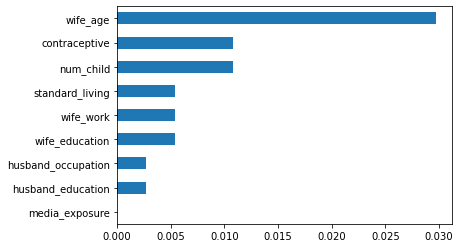

In [371]:
perm_rel_df.head(10).importances_mean.plot(kind = 'barh')

## Children(Linear)

In [359]:
perm_imp_child = permutation_importance(model_child, X_val_child, y_val_child, n_jobs = -1)

In [372]:
data_child = {'importances_mean' : perm_imp_rel['importances_mean'], 
           'importances_std' : perm_imp_rel['importances_std']}

perm_child_df = pd.DataFrame(data_child, X_train_child.columns)
perm_child_df.sort_values('importances_mean', ascending = True, inplace = True)

<AxesSubplot:>

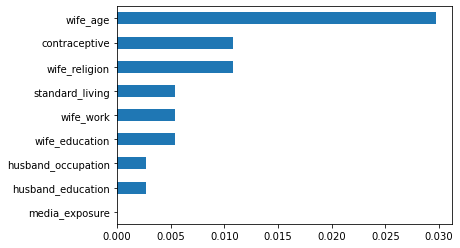

In [373]:
perm_child_df.head(10).importances_mean.plot(kind = 'barh')

# ROC Curve 

## Contraceptive

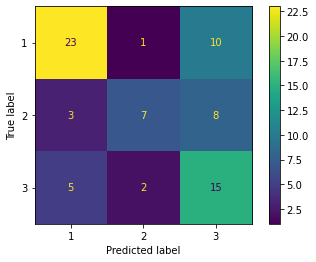

In [554]:
plot_confusion_matrix(model_con, X_val_con, y_val_con, display_labels = ['1', '2', '3'])

In [363]:
print(classification_report(y_val_con, model_con.predict(X_val_con)))

              precision    recall  f1-score   support

           1       0.74      0.68      0.71        34
           2       0.70      0.39      0.50        18
           3       0.45      0.68      0.55        22

    accuracy                           0.61        74
   macro avg       0.63      0.58      0.58        74
weighted avg       0.65      0.61      0.61        74



## Wife Religion

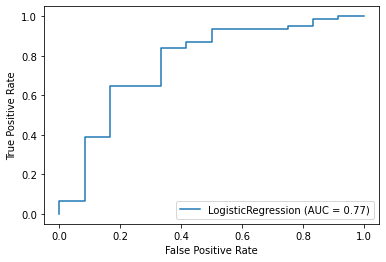

In [364]:
plot_roc_curve(model_rel, X_val_rel, y_val_rel)

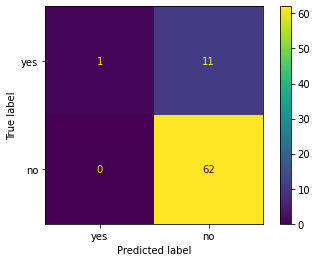

In [365]:
plot_confusion_matrix(model_rel, X_val_rel, y_val_rel, display_labels = ['yes', 'no'])

In [366]:
print(classification_report(y_val_rel, model_rel.predict(X_val_rel)))

              precision    recall  f1-score   support

           0       1.00      0.08      0.15        12
           1       0.85      1.00      0.92        62

    accuracy                           0.85        74
   macro avg       0.92      0.54      0.54        74
weighted avg       0.87      0.85      0.79        74



# Tuning

## Contraception

## Random Search

In [ ]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 37)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(1, 111, num = 111)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]
# Method of selecting samples for training each tree
bootstrap = [True, False]

In [ ]:
random_grid = {'n_estimators': n_estimators,
              'max_features' : max_features,
              'max_depth' : max_depth,
              'min_samples_leaf' : min_samples_leaf,
              'min_samples_split' : min_samples_split,
              'bootstrap' : bootstrap}

In [ ]:
pprint(random_grid)

In [ ]:
rf = RandomForestClassifier()
rf_random = RandomizedSearchCV( estimator = rf,
                               param_distributions = random_grid,
                               n_iter = 1000,
                               cv = 10, 
                               verbose = 5,
                               random_state = 42, 
                               n_jobs = -1
                              )
#rf_random.fit(X_train_con, y_train_con)

In [ ]:
rf_random.best_params_

## Grid Search

In [ ]:
param_grid = {
    'bootstrap': [True],
    'max_depth': [8, 70, 72, 74, 76, 78, 80, 82, 84, 86, 88, 90,
                  92, 94, 96, 98, 100, 102, 104, 106, 108, 110],
    'max_features': [2, 3,],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [3, 4, 5, 6, 7, 8, 9, 10],
    'n_estimators': [500, 550, 600, 650, 700, 1000]
}

In [ ]:
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 5, n_jobs = -1, verbose = 5)

In [ ]:
#grid_search.fit(X_train_con, y_train_con)

In [ ]:
grid_search.best_params_


# Shapley for contraception


In [581]:
applicant_profile = X_val_con.iloc[[1]]
applicant_profile

,wife_age,wife_education,husband_education,num_child,wife_religion,wife_work,husband_occupation,standard_living,media_exposure
184,35,3,4,5,1,0,2,2,0


In [582]:
import shap


In [583]:
explainer = shap.TreeExplainer(model_con)
shap_values = explainer.shap_values(applicant_profile)
shap.initjs()
shap.force_plot(explainer.expected_value[1], shap_values[1], applicant_profile, figsize = (5, 2))

#shap.force_plot(
#    base_value=explainer.expected_value,
#    shap_values= shap_values,
#    features=applicant_profile
#)

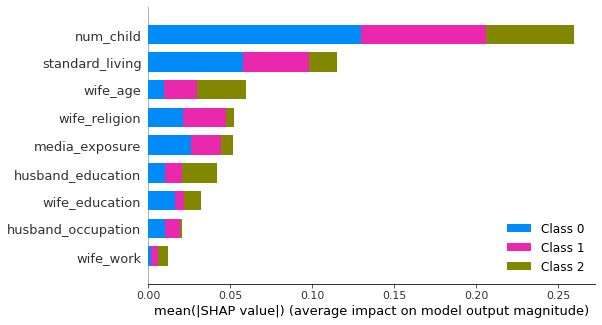

In [571]:
shap.summary_plot(shap_values, features=X_train_con, feature_names=X_train_con.columns)

# PDP plot for Contraception 


In [438]:
from pdpbox.pdp import pdp_isolate, pdp_interact, pdp_plot, pdp_interact_plot

## One Feature

(<Figure size 864x720 with 2 Axes>,
 {'title_ax': <AxesSubplot:>,
  'pdp_ax': <AxesSubplot:xlabel='num_child (class 2)'>})

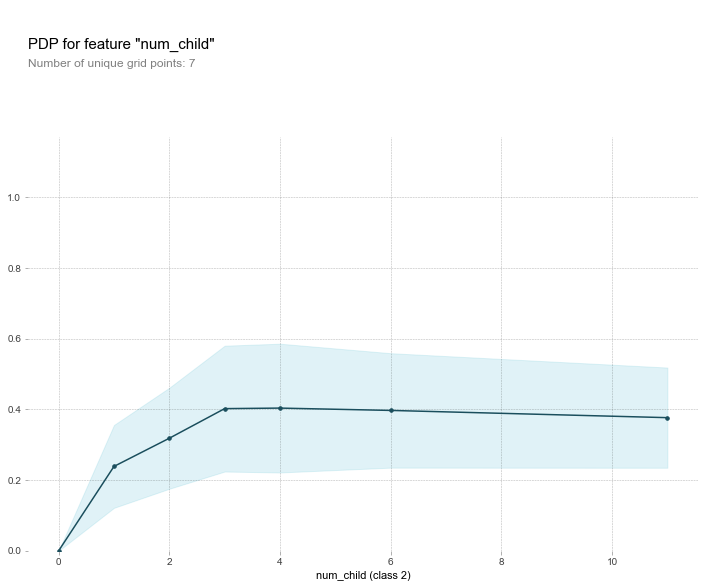

In [463]:
feature = 'num_child'

isolated = pdp_isolate(
        model = model_con,
        dataset = X_val_con,
        model_features = X_val_con.columns, 
        feature = feature)

pdp_plot(isolated[2], feature_name = feature, figsize = (12,10))

## Two Features

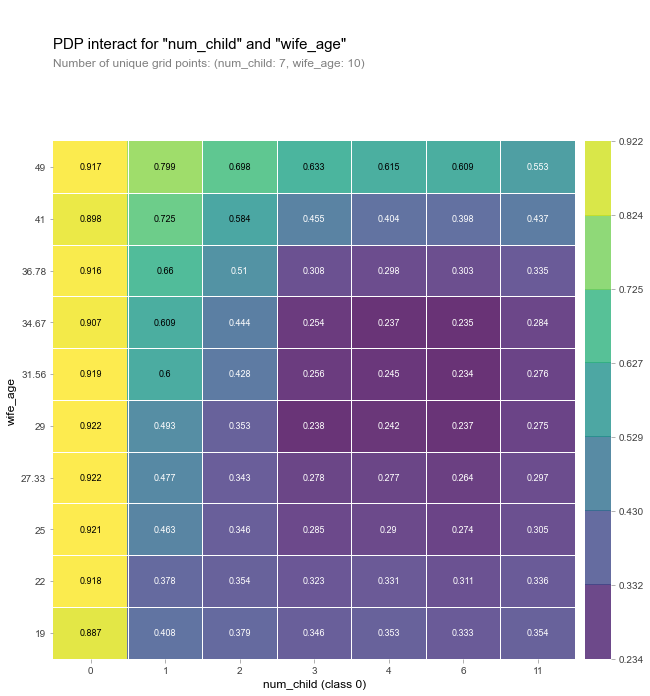

In [584]:
features = ['num_child', 'wife_age']

interaction = pdp_interact(
        model = model_con,
        dataset = X_val_con,
        model_features = X_val_con.columns,
        features = features)
pdp_interact_plot(interaction, 
                  plot_type = 'grid', 
                  feature_names = features, 
                  which_classes = [0],
                  ncols = 20, 
                  figsize = (10, 12));

# Random Forest Visualization

In [537]:
import os
os.environ["PATH"] += os.pathsep + 'D:/Program Files (x86)/Graphviz/bin/'

model_con_vis = DecisionTreeClassifier(max_depth=2)

# Train
model_con_vis.fit(X_train_con, y_train_con)
# Extract single tree
estimator = model_con_vis

from sklearn.tree import export_graphviz
# Export as dot file
dot_data = export_graphviz(estimator, out_file= 'tree4.dot', 
                feature_names = X_train_con.columns,
                class_names = X_train_con.nunique().astype(str),
                rounded = True, proportion = False, 
                precision = 2, filled = True)

graphviz.Source(dot_data)
from subprocess import call
call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])

# Display in jupyter notebook
from IPython.display import Image
Image(filename = 'tree.dot')

FileNotFoundError: [WinError 2] The system cannot find the file specified

Fitting 5 folds for each of 64 candidates, totalling 320 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


ValueError: Invalid parameter C for estimator RandomForestClassifier(). Check the list of available parameters with `estimator.get_params().keys()`.